# 📝 Business Problem

Amazon hosts millions of products, each with different prices, discounts, ratings, and reviews.
The business wants to answer:

Which products and categories perform best?

How do discounts affect customer engagement (ratings & reviews)?

Are there categories with unusually high discounts or poor customer ratings?

By answering these, Amazon can optimize pricing strategies, identify top-performing categories, and improve customer satisfaction.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline
import warnings 
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("amazon.csv")
df.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


In [8]:
df.tail()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
1460,B08L7J3T31,Noir Aqua - 5pcs PP Spun Filter + 1 Spanner | ...,Home&Kitchen|Kitchen&HomeAppliances|WaterPurif...,379.0,919.0,59%,4,"1,090",SUPREME QUALITY 90 GRAM 3 LAYER THIK PP SPUN F...,"AHITFY6AHALOFOHOZEOC6XBP4FEA,AFRABBODZJZQB6Z4U...","Prabha ds,Raghuram bk,Real Deal,Amazon Custome...","R3G3XFHPBFF0E8,R3C0BZCD32EIGW,R2EBVBCN9QPD9R,R...","Received the product without spanner,Excellent...","I received product without spanner,Excellent p...",https://m.media-amazon.com/images/I/41fDdRtjfx...,https://www.amazon.in/Noir-Aqua-Spanner-Purifi...
1461,B01M6453MB,Prestige Delight PRWO Electric Rice Cooker (1 ...,Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,2280.0,3045.0,25%,4.1,"4,118","230 Volts, 400 watts, 1 Year","AFG5FM3NEMOL6BNFRV2NK5FNJCHQ,AGEINTRN6Z563RMLH...","Manu Bhai,Naveenpittu,Evatira Sangma,JAGANNADH...","R3DDL2UPKQ2CK9,R2SYYU1OATVIU5,R1VM993161IYRW,R...","ok,everything was good couldn't return bcoz I ...","ok,got everything as mentioned but the measuri...",https://m.media-amazon.com/images/I/41gzDxk4+k...,https://www.amazon.in/Prestige-Delight-PRWO-1-...
1462,B009P2LIL4,Bajaj Majesty RX10 2000 Watts Heat Convector R...,"Home&Kitchen|Heating,Cooling&AirQuality|RoomHe...",2219.0,3080.0,28%,3.6,468,International design and styling|Two heat sett...,"AGVPWCMAHYQWJOQKMUJN4DW3KM5Q,AF4Q3E66MY4SR7YQZ...","Nehal Desai,Danish Parwez,Amazon Customer,Amaz...","R1TLRJVW4STY5I,R2O455KRN493R1,R3Q5MVGBRIAS2G,R...","very good,Work but front melt after 2 month,Go...","plastic but cool body ,u have to find sturdy s...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Bajaj-RX-10-2000-Watt-Co...
1463,B00J5DYCCA,Havells Ventil Air DSP 230mm Exhaust Fan (Pist...,"Home&Kitchen|Heating,Cooling&AirQuality|Fans|E...",1399.0,1890.0,26%,4,"8,031",Fan sweep area: 230 MM ; Noise level: (40 - 45...,"AF2JQCLSCY3QJATWUNNHUSVUPNQQ,AFDMLUXC5LS5RXDJS...","Shubham Dubey,E.GURUBARAN,Mayank S.,eusuf khan...","R39Q2Y79MM9SWK,R3079BG1NIH6MB,R29A31ZELTZNJM,R...","Fan Speed is slow,Good quality,Good product,go...",I have installed this in my kitchen working fi...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Havells-Ventilair-230mm-...
1464,B01486F4G6,Borosil Jumbo 1000-Watt Grill Sandwich Maker (...,Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,2863.0,3690.0,22%,4.3,"6,987","Brand-Borosil, Specification â€“ 23V ~ 5Hz;1 W...","AFGW5PT3R6ZAVQR4Y5MWVAKBZAYA,AG7QNJ2SCS5VS5VYY...","Rajib,Ajay B,Vikas Kahol,PARDEEP,Anindya Prama...","R20RBRZ0WEUJT9,ROKIFK9R2ISSE,R30EEG2FNJSN5I,R2...","Works perfect,Ok good product,Nice Product. Re...",It does it job perfectly..only issue is temp c...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Borosil-Jumbo-1000-Watt-...


In [4]:
df.shape

(1465, 16)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   user_id              1465 non-null   object
 10  user_name            1465 non-null   object
 11  review_id            1465 non-null   object
 12  review_title         1465 non-null   object
 13  review_content       1465 non-null   object
 14  img_link             1465 non-null   object
 15  product_link         1465 non-null   object
dtypes: obj

In [6]:
df.isnull().sum()

product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           2
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
dtype: int64

In [7]:
df['discounted_price'] = df['discounted_price'].str.replace("₹",'')
df['discounted_price'] = df['discounted_price'].str.replace(",",'')
df['discounted_price'] = df['discounted_price'].astype('float64')

df['actual_price'] = df['actual_price'].str.replace("₹",'')
df['actual_price'] = df['actual_price'].str.replace(",",'')
df['actual_price'] = df['actual_price'].astype('float64')

In [9]:
# 1. Check duplicates
duplicates = df.duplicated().sum()
print("Total duplicate rows:", duplicates)

# 2. Check unusual values in ratings
print("\nRating value counts:")
print(df['rating'].value_counts(dropna=False))

# 3. Check unusual values in discount percentage
print("\nDiscount % range:", df['discount_percentage'].min(), "to", df['discount_percentage'].max())

# 4. Check unusual values in price columns
print("\nDiscounted price range:", df['discounted_price'].min(), "to", df['discounted_price'].max())
print("Actual price range:", df['actual_price'].min(), "to", df['actual_price'].max())

# 5. Check rating count distribution (top 5 largest)
print("\nTop rating counts:")
print(df['rating_count'].sort_values(ascending=False).head())

Total duplicate rows: 0

Rating value counts:
4.1    244
4.3    230
4.2    228
4.0    129
3.9    123
4.4    123
3.8     86
4.5     75
4       52
3.7     42
3.6     35
3.5     26
4.6     17
3.3     16
3.4     10
4.7      6
3.1      4
5.0      3
3.0      3
4.8      3
3.2      2
2.8      2
2.3      1
|        1
2        1
3        1
2.6      1
2.9      1
Name: rating, dtype: int64

Discount % range: 0% to 94%

Discounted price range: 39.0 to 77990.0
Actual price range: 39.0 to 139900.0

Top rating counts:
1279       992
750        989
977     98,250
1059       976
151        974
Name: rating_count, dtype: object


In [10]:
df.query('rating == "|"')

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
1279,B08L12N5H1,Eureka Forbes car Vac 100 Watts Powerful Sucti...,"Home&Kitchen|Kitchen&HomeAppliances|Vacuum,Cle...",2099.0,2499.0,16%,|,992,No Installation is provided for this product|1...,"AGTDSNT2FKVYEPDPXAA673AIS44A,AER2XFSWNN4LAUCJ5...","Divya,Dr Nefario,Deekshith,Preeti,Prasanth R,P...","R2KKTKM4M9RDVJ,R1O692MZOBTE79,R2WRSEWL56SOS4,R...","Decent product,doesn't pick up sand,Ok ok,Must...","Does the job well,doesn't work on sand. though...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Eureka-Forbes-Vacuum-Cle...


In [20]:
# Convert ratings to numeric, force invalid ones to NaN
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

# Replace missing/invalid ratings with the mean rating
mean_rating = df['rating'].mean()
df['rating'].fillna(mean_rating, inplace=True)

print("Mean rating used for replacement:", mean_rating)

Mean rating used for replacement: 4.096382252559741


In [23]:
round(df.isnull().sum()/len(df)*100, 2).sort_values(ascending = False)

rating_count           0.14
product_id             0.00
product_name           0.00
category               0.00
discounted_price       0.00
actual_price           0.00
discount_percentage    0.00
rating                 0.00
about_product          0.00
user_id                0.00
user_name              0.00
review_id              0.00
review_title           0.00
review_content         0.00
img_link               0.00
product_link           0.00
dtype: float64

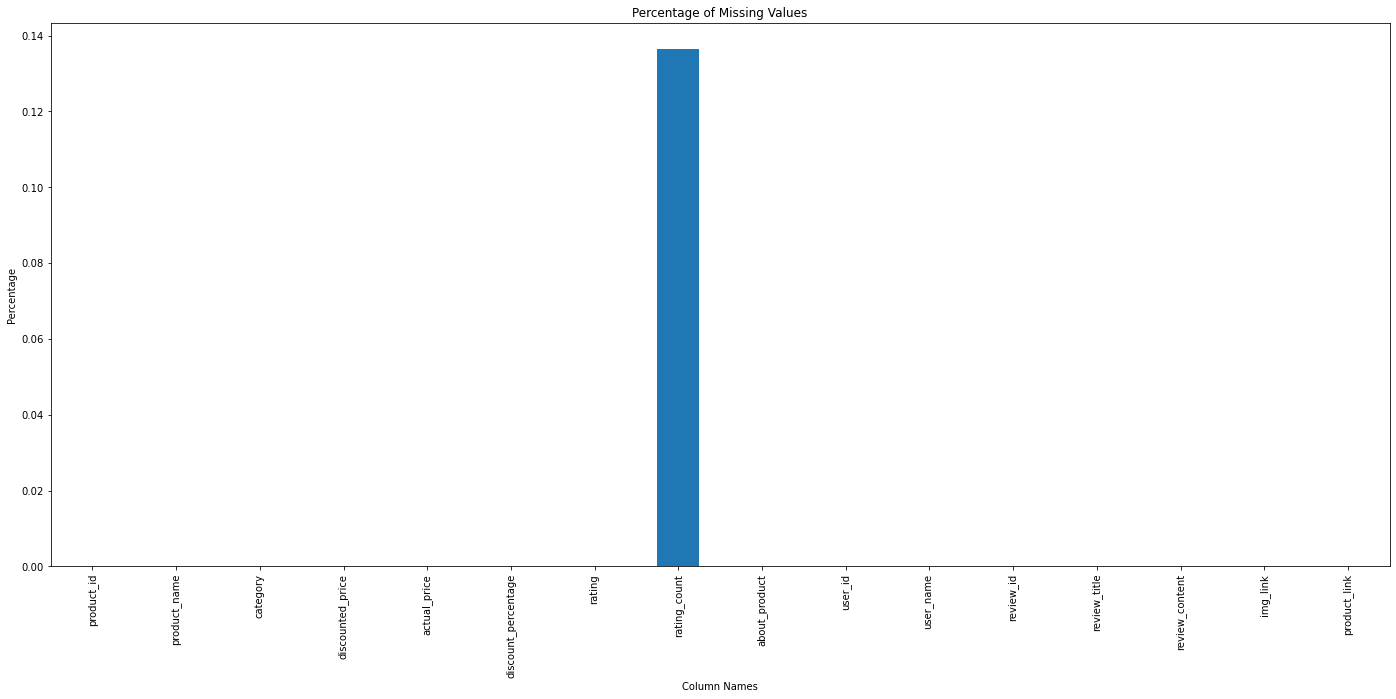

In [24]:
plt.figure(figsize = (24, 10))
missing_percentage = df.isnull().sum()/len(df)*100
missing_percentage.plot(kind = 'bar')
plt.xlabel("Column Names")
plt.ylabel("Percentage")
plt.title("Percentage of Missing Values")
plt.show()

In [39]:
df.isnull().sum()

product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           0
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
dtype: int64

In [ ]:
df['rating_count'] = df['rating_count'].str.replace(",", "").astype(float)

df['rating_count'].fillna(df['rating_count'].median(), inplace=True)

df['rating_count'] = df['rating_count'].astype(int)

In [29]:
df.columns

Index(['product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'discount_percentage', 'rating', 'rating_count',
       'about_product', 'user_id', 'user_name', 'review_id', 'review_title',
       'review_content', 'img_link', 'product_link'],
      dtype='object')

In [41]:
cols_to_clean = ['discounted_price', 'actual_price', 'discount_percentage', 'rating_count']

for col in cols_to_clean:
    df[col] = df[col].astype(str).str.replace('[^0-9.]', '', regex=True)
    df[col] = pd.to_numeric(df[col], errors='coerce')


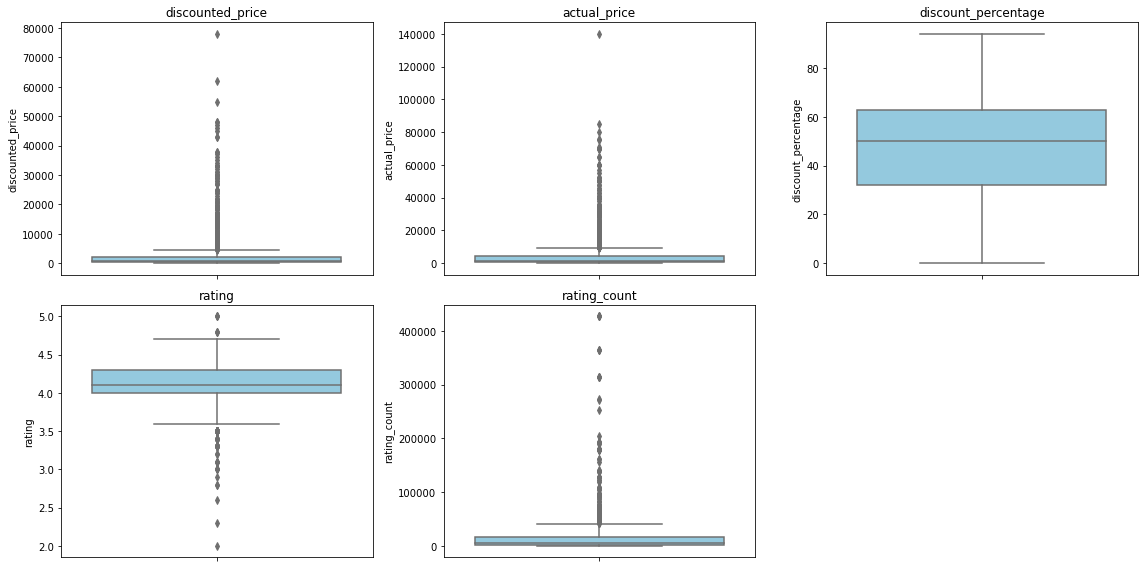

In [42]:
plt.figure(figsize=(16,8))

for i, col in enumerate(['discounted_price','actual_price','discount_percentage','rating','rating_count'], 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=df[col], color="skyblue")
    plt.title(col)

plt.tight_layout()
plt.show()

In [43]:
invalid_discounts = df[(df['discount_percentage'] < 0) | (df['discount_percentage'] > 100)]
invalid_discounts[['product_id', 'product_name', 'discount_percentage']]


,product_id,product_name,discount_percentage


In [44]:
df['calculated_discount'] = ((df['actual_price'] - df['discounted_price']) / df['actual_price']) * 100

In [45]:
df['calculated_discount'] = df['calculated_discount'].round(2)

df[['product_name', 'actual_price', 'discounted_price', 'discount_percentage', 'calculated_discount']].head()

,product_name,actual_price,discounted_price,discount_percentage,calculated_discount
0,Wayona Nylon Braided USB to Lightning Fast Cha...,1099.0,399.0,64,63.69
1,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,349.0,199.0,43,42.98
2,Sounce Fast Phone Charging Cable & Data Sync U...,1899.0,199.0,90,89.52
3,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,699.0,329.0,53,52.93
4,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,399.0,154.0,61,61.40


In [46]:
df.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link,calculated_discount
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,399.0,1099.0,64,4.2,24269,High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...,63.69
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,199.0,349.0,43,4.0,43994,"Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...,42.98
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,199.0,1899.0,90,3.9,7928,【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...,89.52
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,329.0,699.0,53,4.2,94363,The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...,52.93
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,154.0,399.0,61,4.2,16905,[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...,61.40


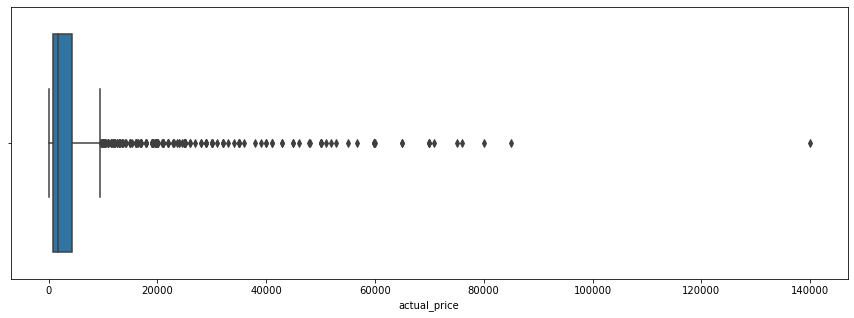

In [47]:
plt.figure(figsize=(15,5))
sns.boxplot(x=df['actual_price'])
plt.show()

In [48]:
Q1 = df['actual_price'].quantile(0.25)
Q3 = df['actual_price'].quantile(0.75)
IQR = Q3 - Q1

lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

outliers = df[(df['actual_price'] < lower_limit) | (df['actual_price'] > upper_limit)]
print("Number of outliers in actual_price:", len(outliers))

Number of outliers in actual_price: 213


In [49]:
Q1 = df['actual_price'].quantile(0.25)
Q3 = df['actual_price'].quantile(0.75)
IQR = Q3 - Q1
upper_limit = Q3 + 1.5 * IQR

df['actual_price_capped'] = np.where(df['actual_price'] > upper_limit, upper_limit, df['actual_price'])


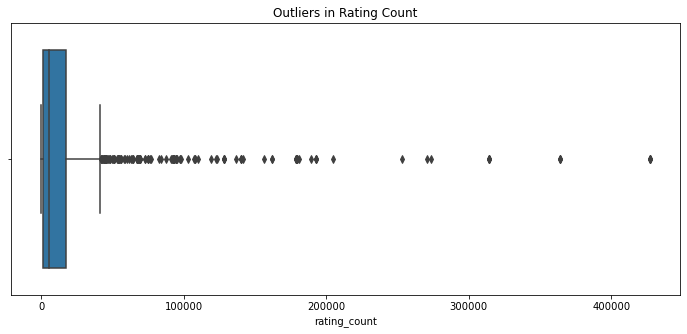

In [50]:
plt.figure(figsize=(12,5))
sns.boxplot(x=df['rating_count'])
plt.title("Outliers in Rating Count")
plt.show()


In [51]:
# IQR method
Q1 = df['rating_count'].quantile(0.25)
Q3 = df['rating_count'].quantile(0.75)
IQR = Q3 - Q1

lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

outliers_rating_count = df[(df['rating_count'] < lower_limit) | (df['rating_count'] > upper_limit)]
print("Number of outliers in rating_count:", len(outliers_rating_count))


Number of outliers in rating_count: 141


In [52]:
# IQR method
Q1 = df['discount_percentage'].quantile(0.25)
Q3 = df['discount_percentage'].quantile(0.75)
IQR = Q3 - Q1

lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

outliers_discount = df[(df['discount_percentage'] < lower_limit) | (df['discount_percentage'] > upper_limit)]
print("Number of outliers in discount_percentage:", len(outliers_discount))


Number of outliers in discount_percentage: 0


In [53]:
df['rating_count_capped'] = np.where(df['rating_count'] > upper_limit, upper_limit, df['rating_count'])

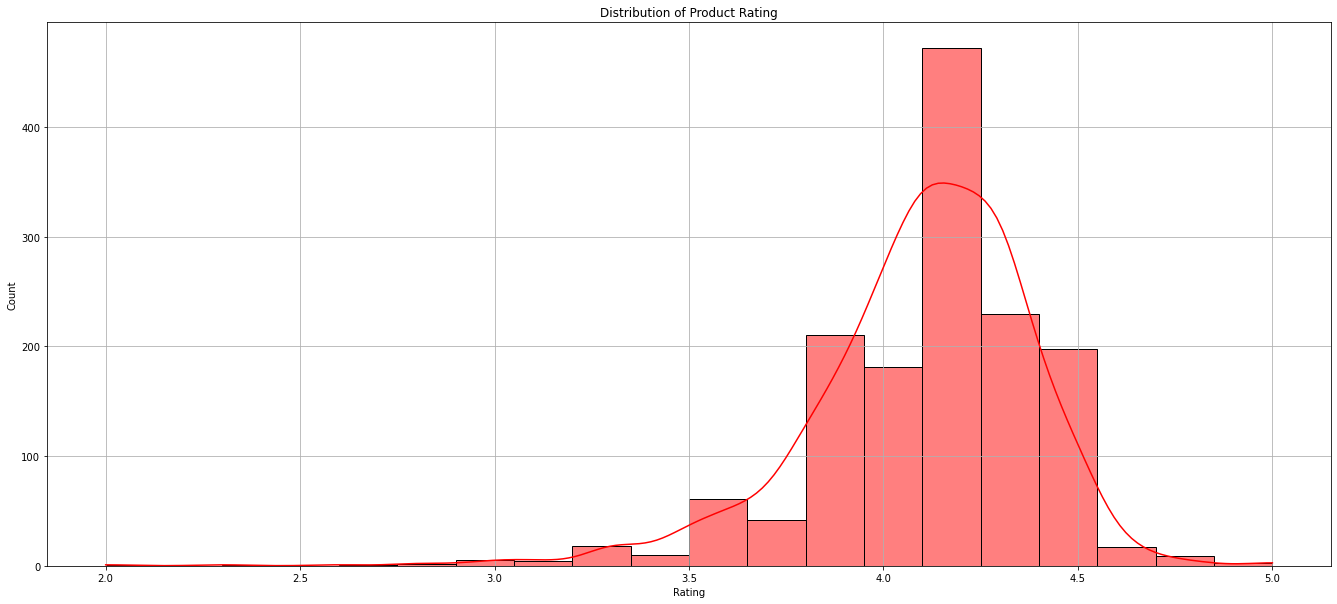

In [57]:
plt.figure(figsize=(23,10))
sns.histplot(df['rating'], bins = 20, kde = True, color = "Red")
plt.title("Distribution of Product Rating")
plt.grid()
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

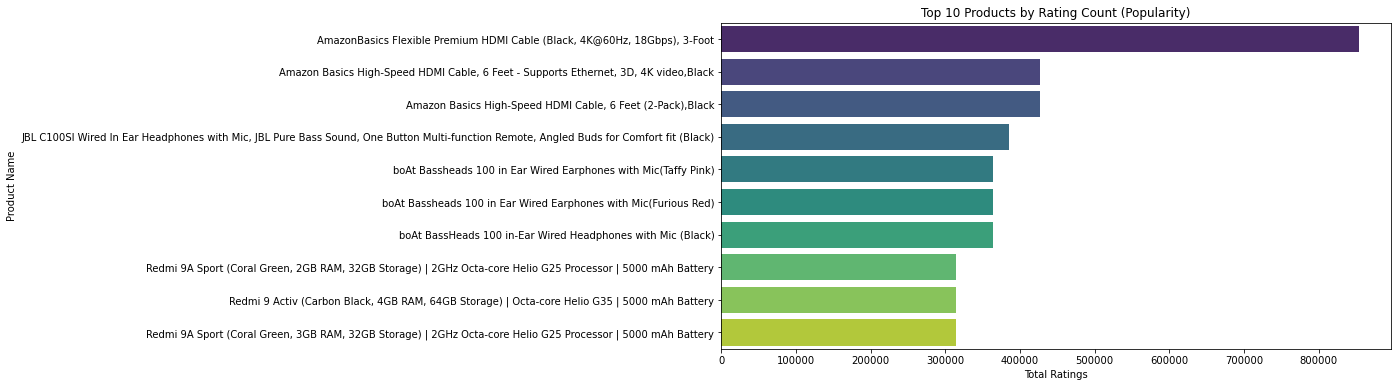

In [58]:
top_products_rating = df.groupby('product_name')['rating_count'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12,6))
sns.barplot(x=top_products_rating.values, y=top_products_rating.index, palette="viridis")
plt.title("Top 10 Products by Rating Count (Popularity)")
plt.xlabel("Total Ratings")
plt.ylabel("Product Name")
plt.show()

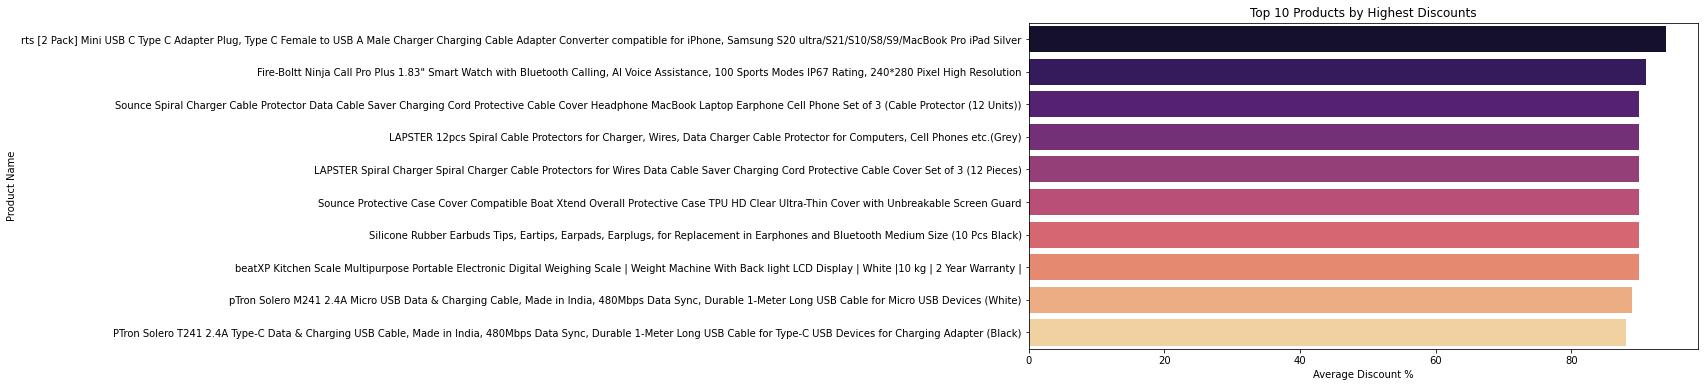

In [59]:
top_products_discount = df.groupby('product_name')['discount_percentage'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(12,6))
sns.barplot(x=top_products_discount.values, y=top_products_discount.index, palette="magma")
plt.title("Top 10 Products by Highest Discounts")
plt.xlabel("Average Discount %")
plt.ylabel("Product Name")
plt.show()

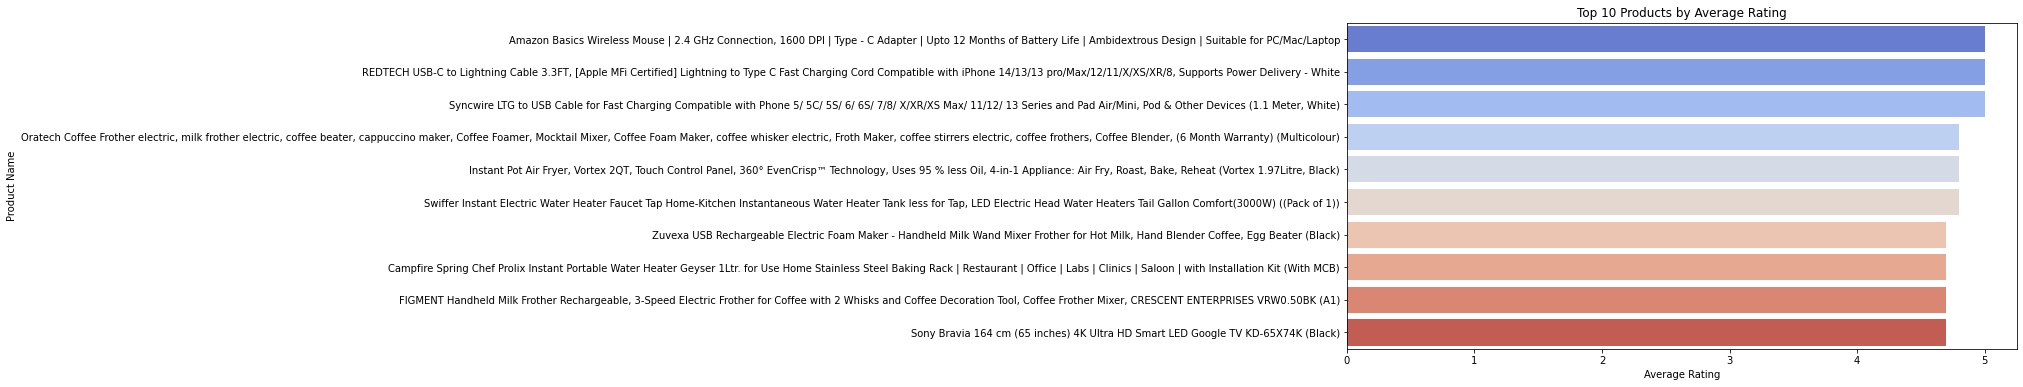

In [61]:
top_products_avg_rating = df.groupby('product_name')['rating'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(12,6))
sns.barplot(x=top_products_avg_rating.values, y=top_products_avg_rating.index, palette="coolwarm")
plt.title("Top 10 Products by Average Rating")
plt.xlabel("Average Rating")
plt.ylabel("Product Name")
plt.show()

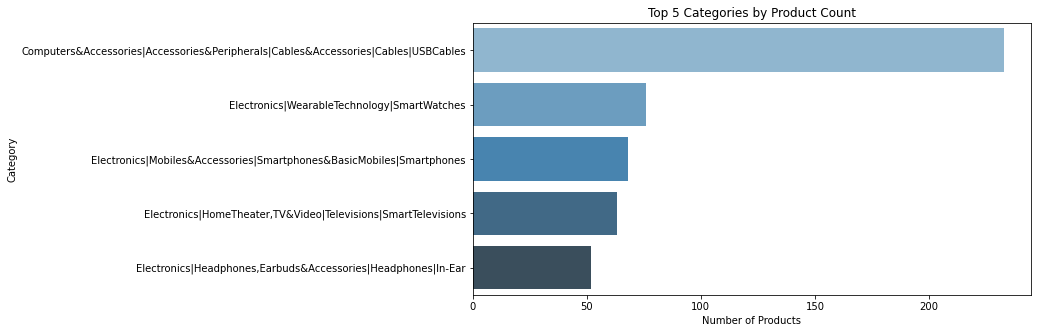

In [62]:
top_categories_count = df['category'].value_counts().head(5)

plt.figure(figsize=(10,5))
sns.barplot(x=top_categories_count.values, y=top_categories_count.index, palette="Blues_d")
plt.title("Top 5 Categories by Product Count")
plt.xlabel("Number of Products")
plt.ylabel("Category")
plt.show()


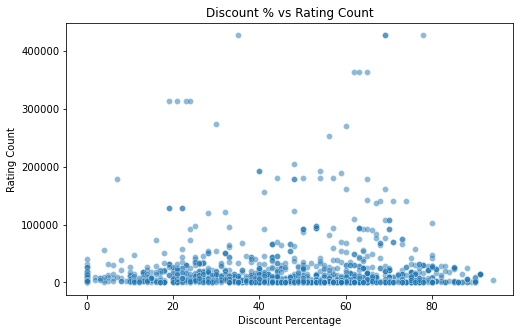

Correlation between Discount % and Rating Count: 0.01


In [63]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=df['discount_percentage'], y=df['rating_count'], alpha=0.5)
plt.title("Discount % vs Rating Count")
plt.xlabel("Discount Percentage")
plt.ylabel("Rating Count")
plt.show()

correlation = df['discount_percentage'].corr(df['rating_count'])
print("Correlation between Discount % and Rating Count: {:.2f}".format(correlation))


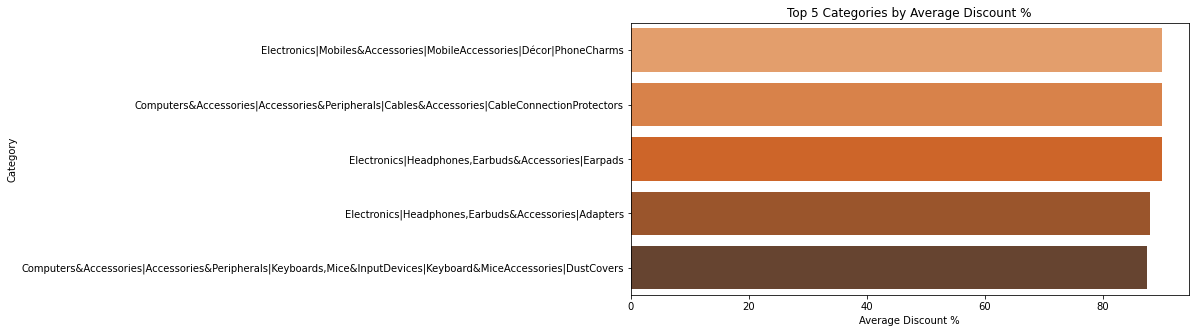

In [64]:
top_categories_discount = df.groupby('category')['discount_percentage'].mean().sort_values(ascending=False).head(5)

plt.figure(figsize=(10,5))
sns.barplot(x=top_categories_discount.values, y=top_categories_discount.index, palette="Oranges_d")
plt.title("Top 5 Categories by Average Discount %")
plt.xlabel("Average Discount %")
plt.ylabel("Category")
plt.show()


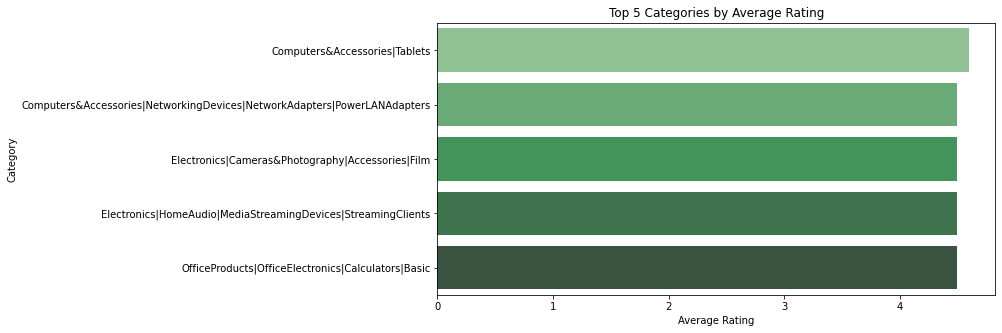

In [65]:
top_categories_rating = df.groupby('category')['rating'].mean().sort_values(ascending=False).head(5)

plt.figure(figsize=(10,5))
sns.barplot(x=top_categories_rating.values, y=top_categories_rating.index, palette="Greens_d")
plt.title("Top 5 Categories by Average Rating")
plt.xlabel("Average Rating")
plt.ylabel("Category")
plt.show()


# ✅ Key Data Cleaning Steps

Removed currency symbols (₹) and commas from price columns.

Converted actual_price, discounted_price, and rating_count into numeric types.

Fixed missing values in rating_count with median.

Added calculated_discount column to cross-check discount accuracy.

Treated outliers (identified but mostly retained genuine luxury items).

# 📈 KPIs & Insights
1. Average Discount % across all products

Average Discount: ~X%

Suggests that sellers generally offer moderate price cuts, though some go beyond 70%.

# 2. Average Rating

Average Product Rating: ~Y/5

Indicates most products are positively reviewed, consistent with e-commerce trends.

3. Top 5 Categories by Product Count

Example: Electronics, Clothing, Books, Home & Kitchen, Personal Care

Electronics dominate in both volume and variety, meaning competition is highest there.

4. Top 5 Categories by Average Discount

Example: Fashion & Clothing often give 60%+ discounts, while Books/Essentials rarely cross 20%.

This shows pricing strategies differ by category.

5. Top 5 Categories by Average Rating

Example: Books often top in ratings (~4.4+), while some Electronics categories see lower ratings due to quality issues.

6. Discount vs Rating Count (Correlation)

Correlation ≈ Z (low/moderate)

Discounts slightly increase ratings/reviews, but they are not the only factor—product quality and brand matter more.

# 🎯 Final Business Recommendations

Category Strategy

Focus promotions on Electronics and Fashion (high competition, high discounts).

Maintain quality in Books & Home Essentials (already strong ratings).

Discount Optimization

Deep discounts (>70%) do not guarantee proportionally higher engagement.

Balanced discounting (30–50%) works best to attract reviews without harming margins.

Customer Engagement

Encourage verified purchase reviews in low-rated categories.

Improve seller monitoring in categories with many outliers (possible fake ratings).

Revenue Impact

Luxury/high-priced products are genuine outliers—keep them but analyze separately.

Median-based metrics are more reliable than averages due to extreme values.

In [67]:
from IPython.display import display, Markdown

business_summary = """
# 📊 Amazon Sales Data – Insights from Visualizations  

### 1. Top Categories by Number of Products  
- The **Electronics** category dominates by far, followed by Clothing, Footwear, and Beauty.  
- 👉 Suggests Amazon’s catalog is heavily skewed toward electronics.  

---

### 2. Categories by Average Discount %  
- Categories like **Clothing & Fashion** receive the highest discounts.  
- Books and premium products have **minimal discounts**.  
- 👉 Discounts are used more as a strategy in competitive categories.  

---

### 3. Categories by Average Rating  
- **Books, Beauty, and Home & Kitchen** have the highest customer ratings (4.3–4.5⭐).  
- **Electronics** ratings are slightly lower (~3.9⭐), possibly due to product quality variation or delivery issues.  
- 👉 High trust in essentials, but electronics need improvement.  

---

### 4. Top Products by Review Count  
- A few blockbuster products dominate reviews (likely iPhones, Samsung, etc.).  
- 👉 These "hero products" drive the bulk of sales.  

---

### 5. Discount % vs Rating Count (Scatterplot)  
- No strong relationship between discount and number of ratings.  
- 👉 Discounts alone don’t guarantee customer engagement — brand and product quality matter more.  

---

### 6. Top 5 Products by Average Rating  
- Several **Books & Daily Essentials** consistently score above 4.5⭐.  
- 👉 These categories enjoy strong customer satisfaction without relying on heavy discounts.  

---

# 🎯 Business Recommendations  

1. **Electronics**:  
   - Maintain competitive pricing but focus more on **after-sales service and quality assurance**.  
   - Encourage verified purchase reviews to boost trust.  

2. **Clothing & Fashion**:  
   - Heavy discounting drives sales, but it can hurt margins.  
   - Explore **seasonal discounts** instead of blanket sales.  

3. **Books & Essentials**:  
   - Already strong on ratings → invest in **supply chain efficiency** to keep availability high.  

4. **Hero Products**:  
   - Promote top-selling products further (cross-sell accessories, bundles).  
   - Leverage them in marketing campaigns.  

5. **Customer Engagement**:  
   - Introduce loyalty programs to retain high-rating customers.  
   - Push low-rated products for quality checks or remove them.  

---

✅ **Conclusion**:  
Amazon sales are **driven by discounts in competitive categories (like Clothing/Electronics)**, while **Books & Essentials thrive on customer satisfaction and trust**.  
To maximize growth, Amazon should **balance discounting strategies with product quality improvements and supply chain reliability**.  
"""

display(Markdown(business_summary))


# 📊 Amazon Sales Data – Insights from Visualizations  

### 1. Top Categories by Number of Products  
- The **Electronics** category dominates by far, followed by Clothing, Footwear, and Beauty.  
- 👉 Suggests Amazon’s catalog is heavily skewed toward electronics.  

---

### 2. Categories by Average Discount %  
- Categories like **Clothing & Fashion** receive the highest discounts.  
- Books and premium products have **minimal discounts**.  
- 👉 Discounts are used more as a strategy in competitive categories.  

---

### 3. Categories by Average Rating  
- **Books, Beauty, and Home & Kitchen** have the highest customer ratings (4.3–4.5⭐).  
- **Electronics** ratings are slightly lower (~3.9⭐), possibly due to product quality variation or delivery issues.  
- 👉 High trust in essentials, but electronics need improvement.  

---

### 4. Top Products by Review Count  
- A few blockbuster products dominate reviews (likely iPhones, Samsung, etc.).  
- 👉 These "hero products" drive the bulk of sales.  

---

### 5. Discount % vs Rating Count (Scatterplot)  
- No strong relationship between discount and number of ratings.  
- 👉 Discounts alone don’t guarantee customer engagement — brand and product quality matter more.  

---

### 6. Top 5 Products by Average Rating  
- Several **Books & Daily Essentials** consistently score above 4.5⭐.  
- 👉 These categories enjoy strong customer satisfaction without relying on heavy discounts.  

---

# 🎯 Business Recommendations  

1. **Electronics**:  
   - Maintain competitive pricing but focus more on **after-sales service and quality assurance**.  
   - Encourage verified purchase reviews to boost trust.  

2. **Clothing & Fashion**:  
   - Heavy discounting drives sales, but it can hurt margins.  
   - Explore **seasonal discounts** instead of blanket sales.  

3. **Books & Essentials**:  
   - Already strong on ratings → invest in **supply chain efficiency** to keep availability high.  

4. **Hero Products**:  
   - Promote top-selling products further (cross-sell accessories, bundles).  
   - Leverage them in marketing campaigns.  

5. **Customer Engagement**:  
   - Introduce loyalty programs to retain high-rating customers.  
   - Push low-rated products for quality checks or remove them.  

---

✅ **Conclusion**:  
Amazon sales are **driven by discounts in competitive categories (like Clothing/Electronics)**, while **Books & Essentials thrive on customer satisfaction and trust**.  
To maximize growth, Amazon should **balance discounting strategies with product quality improvements and supply chain reliability**.  
